In [1]:
# Pandas
import pandas as pd

# import psycoph2

import psycopg2


In [2]:
conn = psycopg2.connect('dbname = sql-challenge user=postgres')
cur = conn.cursor()
cur.execute('SELECT * FROM employees LIMIT 5')

In [5]:
cur.execute('SELECT * FROM salaries')

In [6]:
salaries = cur.fetchall()

In [8]:
sal_df = pd.DataFrame(data=salaries, columns = ['emp_no', 'salary'])
sal_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [9]:
import matplotlib.pyplot as plt

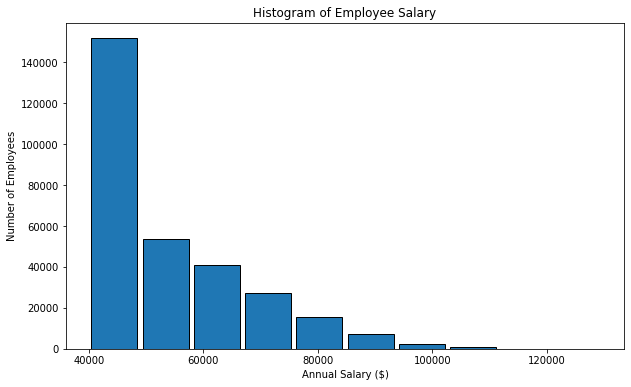

In [24]:
#Make a histogram of employee salary
fig, ax = plt.subplots(figsize = (10,6))
#Here I tell it to use the salary column of the sal_df I imported.
# I also specify columnwidth of .9 to make distinct columns, as well as a small black edge.
ax.hist(sal_df['salary'], bins=10, rwidth = .9, linewidth=1, edgecolor='black')
ax.set_ylabel('Number of Employees')
ax.set_xlabel('Annual Salary ($)')
plt.title("Histogram of Employee Salary")
plt.show()

In [21]:
cur.execute('SELECT salaries, title FROM salaries JOIN employees ON salaries.emp_no = employees.emp_no JOIN titles ON employees.title_id = titles.title_id')
sal_title = pd.DataFrame(data=cur.fetchall(), columns = ['Salary', 'Title'])

In [23]:
sal_title.head()

,Salary,Title
0,48973,Engineer
1,40000,Senior Engineer
2,43548,Technique Leader
3,63377,Staff
4,40000,Senior Engineer


In [34]:
st_group = sal_title.groupby('Title').mean().round(2).reset_index()
st_group

,Title,Salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


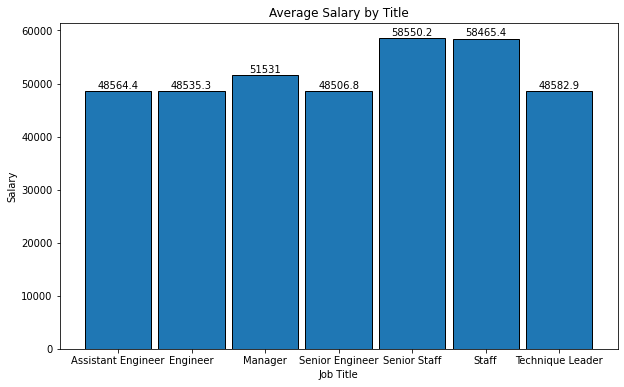

In [35]:
fig2, ax2 = plt.subplots(figsize=(10,6))
bars = ax2.bar(st_group['Title'], st_group['Salary'], width = 0.9, linewidth = 1, edgecolor = 'black')
ax2.set_xlabel('Job Title')
ax2.set_ylabel('Salary')
ax2.bar_label(bars, padding = 1)
plt.title('Average Salary by Title')
plt.show()